# Stage Analysis

In this notebook I analyze the time the program takes for each stage of the algorithm.
Here you will find the 3 versions:

1. Sequential
2. Parallel THR (Native C++ Threads)
3. Parallel FF (using Fast Flow Lib)


In [5]:
from b_tools.preprocess import get_standardized_measures

### Sequential

In [6]:
# Choose the file
SEQ_RESULT_FILE="results/sequential_10.csv"

In [7]:
seq = get_standardized_measures(SEQ_RESULT_FILE)

In [8]:
seq.describe()

,READING,HUFFBUILD,ENCODING,WRITING,TOTAL
count,5.000000e+00,5.00000,5.000000e+00,5.000000e+00,5.000000e+00
mean,1.188397e+09,66954.40000,1.232178e+09,1.592866e+09,4.013509e+09
std,1.497059e+07,609.54926,3.457956e+07,3.978124e+07,7.525777e+07
min,1.175954e+09,66077.00000,1.210424e+09,1.555500e+09,3.967539e+09
25%,1.177141e+09,66725.00000,1.214138e+09,1.573816e+09,3.972602e+09
50%,1.181869e+09,66992.00000,1.221306e+09,1.575178e+09,3.987982e+09
75%,1.195913e+09,67276.00000,1.221577e+09,1.602419e+09,3.992577e+09
max,1.211109e+09,67702.00000,1.293446e+09,1.657418e+09,4.146845e+09


In [9]:
seq_stages = list(seq.columns)
seq_stages.remove('TOTAL')
seq_means = [seq[stage].mean() for stage in seq_stages]

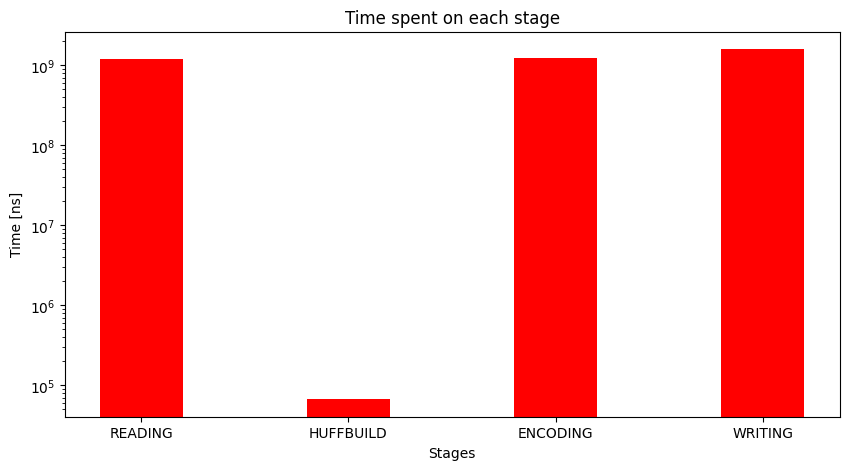

In [10]:
import matplotlib.pyplot as plt 
 
fig = plt.figure(figsize = (10, 5))
plt.bar(seq_stages, seq_means, color='red', width=0.4)
 
plt.xlabel("Stages")
plt.ylabel("Time [ns]")
plt.yscale('log')
plt.title("Time spent on each stage")
plt.show()

## Parallel (THR)

In [13]:
thr = get_standardized_measures('results/thr_10.csv', excluded_columns=['P_DEGREE'])

FileNotFoundError: [Errno 2] No such file or directory: 'results/thr_10.csv'

In [ ]:
def plot_for_p(p_degree, data):
    thr_data = data[data['P_DEGREE'] == p_degree]
    thr_stages = list(thr_data.columns)
    thr_stages.remove('TOTAL')
    thr_stages.remove('P_DEGREE')
    thr_means = [seq[stage].mean() for stage in thr_stages]
    fig = plt.figure(figsize = (10, 5))
    plt.bar(thr_stages, thr_means, color='blue', width=0.4)
    plt.xlabel("Stages")
    plt.ylabel("Time [ns]")
    plt.yscale('log')
    plt.title("Time spent on each stage")
    plt.show()

In [ ]:
plot_for_p(11, thr)